In [1]:
import pandas as pd
from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.python.keras.models import Sequential
from tqdm import tqdm
from numpy import array

In [2]:
DATASET_PATH = \
    r"https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
DATE_COLUMN = "Month"
X_COLUMN = "Passengers"

# parse_dates : parses dates from string to DatetimeIndex
# index_col : set specified column as dataset index
df = pd.read_csv(DATASET_PATH, parse_dates=[DATE_COLUMN], index_col=DATE_COLUMN)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
# NOTE : You dont need the dates column here
x_train = df[X_COLUMN].values
x_test = df[X_COLUMN].values

x_test

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [4]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in tqdm(range(len(sequence))):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


n_steps = 3
n_features = 1

# dividing train sequence into input/output samples
x_train, y_train = split_sequence(x_train, n_steps=n_steps)

# dividing test sequence into input/output samples
x_test, y_test = split_sequence(x_test, n_steps=n_steps)

for i in range(len(x_train)):
    print(x_train[i], y_train[i])

 98%|█████████▊| 141/144 [00:00<00:00, 657107.63it/s]

[112 118 132] 129
[118 132 129] 121
[132 129 121] 135
[129 121 135] 148
[121 135 148] 148
[135 148 148] 136
[148 148 136] 119
[148 136 119] 104
[136 119 104] 118
[119 104 118] 115
[104 118 115] 126
[118 115 126] 141
[115 126 141] 135
[126 141 135] 125
[141 135 125] 149
[135 125 149] 170
[125 149 170] 170
[149 170 170] 158
[170 170 158] 133
[170 158 133] 114
[158 133 114] 140
[133 114 140] 145
[114 140 145] 150
[140 145 150] 178
[145 150 178] 163
[150 178 163] 172
[178 163 172] 178
[163 172 178] 199
[172 178 199] 199
[178 199 199] 184
[199 199 184] 162
[199 184 162] 146
[184 162 146] 166
[162 146 166] 171
[146 166 171] 180
[166 171 180] 193
[171 180 193] 181
[180 193 181] 183
[193 181 183] 218
[181 183 218] 230
[183 218 230] 242
[218 230 242] 209
[230 242 209] 191
[242 209 191] 172
[209 191 172] 194
[191 172 194] 196
[172 194 196] 196
[194 196 196] 236
[196 196 236] 235
[196 236 235] 229
[236 235 229] 243
[235 229 243] 264
[229 243 264] 272
[243 264 272] 237
[264 272 237] 211
[272 237 2

In [5]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))

In [6]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [10]:
# fit model
model.fit(x_train, y_train,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
5/5 [==============================] - 0s 41ms/step - loss: 1922.9788 - val_loss: 1831.6166
Epoch 2/200
5/5 [==============================] - 0s 32ms/step - loss: 1770.8123 - val_loss: 1629.7881
Epoch 3/200
5/5 [==============================] - 0s 31ms/step - loss: 1638.3993 - val_loss: 1582.1449
Epoch 4/200
5/5 [==============================] - 0s 30ms/step - loss: 1567.1760 - val_loss: 1603.2679
Epoch 5/200
5/5 [==============================] - 0s 38ms/step - loss: 1640.1616 - val_loss: 1556.6681
Epoch 6/200
5/5 [==============================] - 0s 38ms/step - loss: 1549.9877 - val_loss: 1521.7047
Epoch 7/200
5/5 [==============================] - 0s 32ms/step - loss: 1525.9260 - val_loss: 1508.5634
Epoch 8/200
5/5 [==============================] - 0s 40ms/step - loss: 1599.4514 - val_loss: 1501.4559
Epoch 9/200
5/5 [==============================] - 0s 36ms/step - loss: 1511.6003 - val_loss: 1493.3907
Epoch 10/200
5/5 [==============================] - 0s 33ms/step

In [12]:
# Inference
x_input = array([508,461,390])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[356.1688]]


In [16]:
# Testing on x_test
predictions = model.predict(x_test)
# bringing to similar shape
predictions = predictions.reshape(y_test.shape)

array([131.07103 , 130.98233 , 125.81127 , 138.47612 , 145.63374 ,
       151.04295 , 141.06104 , 125.61068 , 111.71494 , 122.20631 ,
       116.18966 , 128.77638 , 138.43578 , 137.44017 , 130.50926 ,
       149.29863 , 161.60246 , 171.96104 , 164.03246 , 141.64847 ,
       125.000175, 141.75809 , 142.20045 , 154.00917 , 173.07024 ,
       165.35738 , 181.03035 , 181.66217 , 197.9988  , 202.30754 ,
       191.64326 , 169.68927 , 154.24844 , 171.03755 , 171.09727 ,
       183.77226 , 194.27202 , 186.93794 , 192.92493 , 213.13503 ,
       223.96313 , 246.0616  , 214.74255 , 203.11095 , 180.55888 ,
       201.1334  , 197.87636 , 205.41862 , 230.8175  , 233.24957 ,
       243.19295 , 253.53798 , 264.8387  , 277.17227 , 245.4944  ,
       227.528   , 194.60258 , 213.6403  , 206.19801 , 195.5237  ,
       232.5666  , 225.20763 , 247.8766  , 263.3181  , 290.90396 ,
       301.1127  , 272.47702 , 247.53369 , 217.40306 , 240.17772 ,
       239.95393 , 245.65868 , 271.4581  , 270.92465 , 287.035

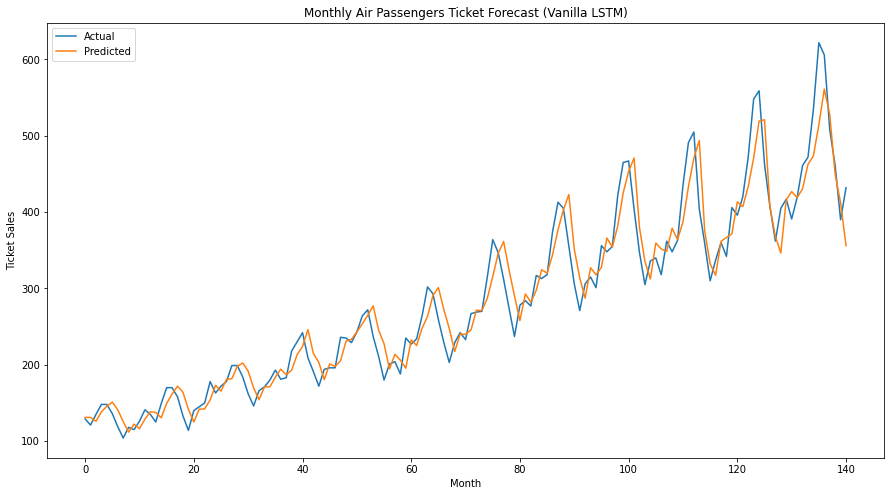

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(y_test,label="Actual")
plt.plot(predictions,label="Predicted")
plt.legend()
plt.title("Monthly Air Passengers Ticket Forecast (Vanilla LSTM)")
plt.xlabel("Month")
plt.ylabel("Ticket Sales")
plt.show()